# Powerplants EDA: Linear Regressions

### In this notebook, I conduct linear regressions using data from the U.S. Energy Information Administration of all natural gas power plants used for electricity in the U.S. as of November 2024 and demographic variables from the U.S. Census. I focus on New York and Texas only.

## Scripts to use R and Python in the same notebook

In [105]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [107]:
%%R

# My commonly used R imports

require('tidyverse')

## Reading in the dataset

In [108]:
df = pd.read_csv('plants_merged_eji.csv')

In [109]:
pd.set_option('display.max_columns', None)

In [110]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT,contains_energy_source,Technology_Category,Category_Number,fossil_fuels,renewables,energy_category_numeric
0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,Census Tract 208.04; Autauga County; Alabama,5497.0,765.0,4677.0,0.1984,0.0117,0.1984,0.0259,0.3427,0.0033,27.3,0.4360,0.4360,0.4360,18.3372,0.2902,5.8,0.3411,1.1,0.0773,12.2,0.1640,18.0,0.2735,3.5,0.2412,1.5,0.0547,1.4420,0.0869,12.7,0.3003,28.1,0.8449,13.1,0.5267,0.0,0.0000,1.6719,0.2520,1.4,0.5727,0.1,0.3697,0.9424,0.6190,4.4923,0.1467,0.0,0.0,0.0,0.0,0.1394,0.2771,30.0,0.4976,0.7747,0.2051,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,30.4266,0.8464,8.9,0.0851,4.2917,0.9285,1.8600,0.7009,0.0000,0.0000,81.7290,0.4809,0.0000,0.0000,0.4809,0.1573,0.058,0.1830,0,0.1830,0.1830,3.2986,0.0517,9.2,0.1418,0.0,7.0,0.3678,0.0,4.8,0.1258,0.0,15.0,0.2710,0.0,9.3,0.1747,0.0,0.0,0.0,8.6,0.2039,0.2039,0.2039,0.0,0.0,4.6,0.1365,0.1365,0.1356,0.0000,0.0000,1.0,27.0455,0.6730,9.0,0.0760,0.5691,9.0,1.0833,0.2440,9.0,1.2050,0.3395,9.0,0.0278,0.0000,2.0,1.8256,0.5080,2.1660,0.1443,1071.0,19.5,207.0,3.8,43.0,0.8,0.0,0.0,0.0,0.0,156.0,2.8,26.0,0.5,0.0,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0.0
1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,Census Tract 107.06; Baldwin County; Alabama,4211.0,476.0,2672.0,0.4449,0.0620,0.2449,0.0390,1.0690,0.1261,15.6,0.2628,0.2628,0.2628,14.6876,0.2093,1.3,0.0561,5.4,0.5849,14.0,0.2018,10.0,0.0514,8.3,0.5899,5.7,0.2606,1.9540,0.1685,14.8,0.4138,21.6,0.4970,10.3,0.3319,0.8,0.4212,1.6639,0.2469,2.7,0.6395,0.0,0.0000,0.6395,0.3690,4.5202,0.1501,0.0,0.0,0.0,0.0,0.1972,0.4430,30.0,0.4976,0.9406,0.2791,0.0,0.0,0.0000,0.0000,5.0200,0.5182,0.0,0.0,0.0,0.0,0.0,0.0,0.5182,0.2390,26.2352,0.8608,25.8,0.2052,7.5417,0.6105,1.6765,0.5381,0.0000,0.0000,46.4915,0.3473,0.0000,0.0000,0.3473,0.1090,0.124,0.2409,0,0.2409,0.2409,3.7235,0.0948,9.4,0.1813,0.0,10.8,0.8848,1.0,7.5,0.6064,0.0,14.8,0.2508,0.0,11.9,0.4866,0.0,1.0,0.2,10.4,0.3122,0.3122,0.3122,0.0,0.0,3.7,0.0753,0.0753,0.0747,0.0120,0.1420,9.0,13.3636,0.4777,

In [111]:
pd.set_option('display.max_rows', None)

In [112]:
df.dtypes

STATEFP                                 int64
COUNTYFP                                int64
TRACTCE                                 int64
AFFGEOID                               object
GEOID                                   int64
GEOID_2020                              int64
COUNTY_x                               object
StateDesc                              object
STATEABBR                              object
LOCATION                               object
E_TOTPOP                              float64
M_TOTPOP                              float64
E_DAYPOP                              float64
SPL_EJI                               float64
RPL_EJI                               float64
SPL_SER                               float64
RPL_SER                               float64
SPL_EJI_CBM                           float64
RPL_EJI_CBM                           float64
E_MINRTY                              float64
EPL_MINRTY                            float64
SPL_SVM_DOM1                      

In [113]:
df['energy_category_numeric'].value_counts()

energy_category_numeric
0.0    79159
1.0     6345
2.0     1171
5.0     1010
3.0      569
4.0      110
Name: count, dtype: int64

In [114]:
df['Primary Technology'].value_counts()

Primary Technology
Solar Photovoltaic                             3942
Conventional Hydroelectric                     1028
Onshore Wind Turbine                            912
Multiple                                        673
Petroleum Liquids                               565
Natural Gas Fired Combustion Turbine            450
Natural Gas Fired Combined Cycle                316
Natural Gas Internal Combustion Engine          208
Landfill Gas                                    188
Batteries                                       170
--                                              113
Wood/Wood Waste Biomass                         113
Conventional Steam Coal                         109
Natural Gas Steam Turbine                       100
Other Natural Gas                                97
Other Waste Biomass                              51
Geothermal                                       49
Nuclear                                          41
All Other                                    

## Reading in the dataset in R

In [115]:
%%R

df <- read_csv('plants_merged_eji.csv', show_col_types = FALSE)
df

# A tibble: 88,364 × 195
   STATEFP COUNTYFP TRACTCE AFFGEOID         GEOID GEOID_2020 COUNTY_x StateDesc
     <dbl>    <dbl>   <dbl> <chr>            <dbl>      <dbl> <chr>    <chr>    
 1       1        1   20804 140000US010010… 1.00e9 1001020804 Autauga… Alabama  
 2       1        3   10706 140000US010030… 1.00e9 1003010706 Baldwin… Alabama  
 3       1        3   11503 140000US010030… 1.00e9 1003011503 Baldwin… Alabama  
 4       1        3   11604 140000US010030… 1.00e9 1003011604 Baldwin… Alabama  
 5       1        5  950100 140000US010059… 1.01e9 1005950100 Barbour… Alabama  
 6       1        9   50501 140000US010090… 1.01e9 1009050501 Blount … Alabama  
 7       1        9   50701 140000US010090… 1.01e9 1009050701 Blount … Alabama  
 8       1       13  952700 140000US010139… 1.01e9 1013952700 Butler … Alabama  
 9       1       13  952900 140000US010139… 1.01e9 1013952900 Butler … Alabama  
10       1       13  953200 140000US010139… 1.01e9 1013953200 Butler … Alabama  
# ℹ

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [116]:
%%R

colnames(df)

  [1] "STATEFP"                            "COUNTYFP"                          
  [3] "TRACTCE"                            "AFFGEOID"                          
  [5] "GEOID"                              "GEOID_2020"                        
  [7] "COUNTY_x"                           "StateDesc"                         
  [9] "STATEABBR"                          "LOCATION"                          
 [11] "E_TOTPOP"                           "M_TOTPOP"                          
 [13] "E_DAYPOP"                           "SPL_EJI"                           
 [15] "RPL_EJI"                            "SPL_SER"                           
 [17] "RPL_SER"                            "SPL_EJI_CBM"                       
 [19] "RPL_EJI_CBM"                        "E_MINRTY"                          
 [21] "EPL_MINRTY"                         "SPL_SVM_DOM1"                      
 [23] "RPL_SVM_DOM1"                       "E_POV200"                          
 [25] "EPL_POV200"                      

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2360 rows containing non-finite outside the scale range (`stat_bin()`). 



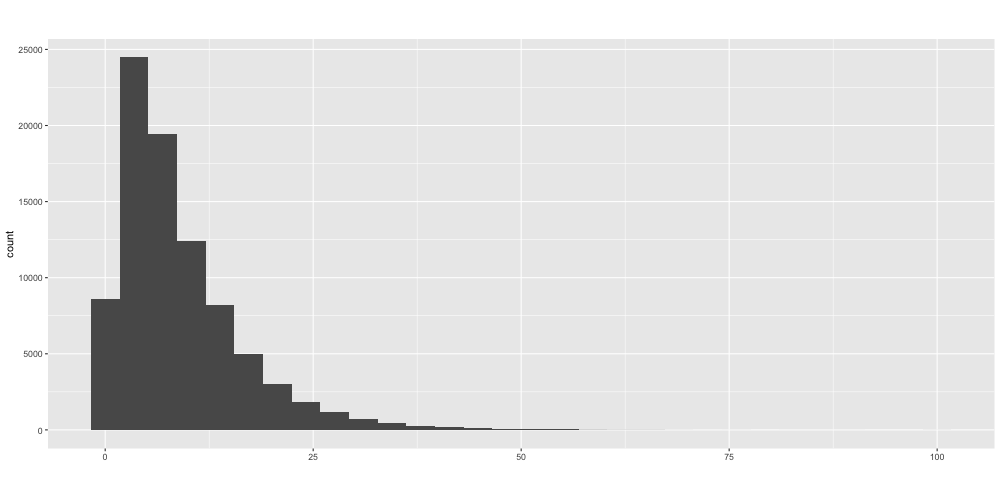

In [117]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_histogram() +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2360 rows containing non-finite outside the scale range (`stat_bin()`). 



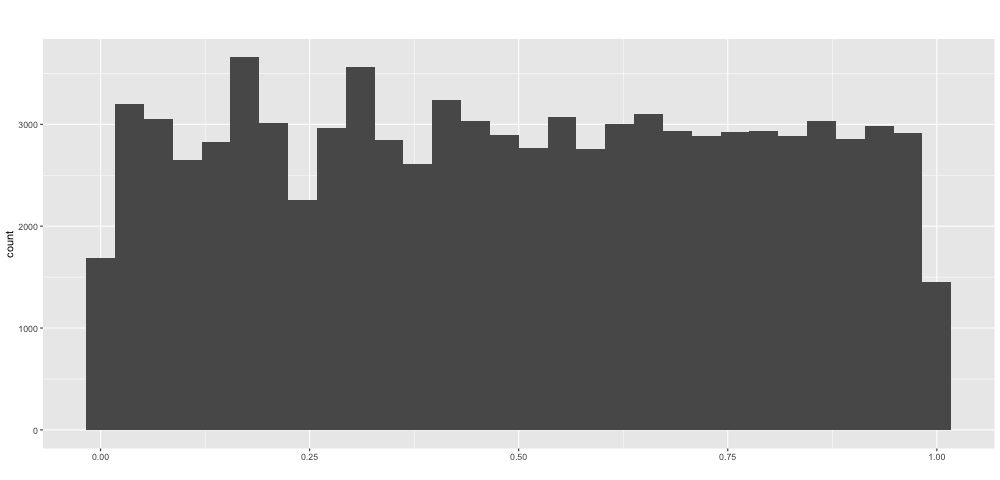

In [118]:
%%R -w 1000

ggplot(df) +
    aes(x=EPL_UNINSUR) +
    geom_histogram() +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="")

## Conducting a regression looking at the existence of a powerplant based on the percent of households below poverty in each census tract

In [119]:
%%R

model <- lm(fossil_fuels~E_UNINSUR, data=df)
summary(model)


Call:
lm(formula = fossil_fuels ~ E_UNINSUR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02304 -0.02222 -0.02147 -0.02023  0.98727 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.304e-02  7.568e-04  30.442  < 2e-16 ***
E_UNINSUR   -2.266e-04  6.564e-05  -3.452 0.000557 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1435 on 86002 degrees of freedom
  (2360 observations deleted due to missingness)
Multiple R-squared:  0.0001385,	Adjusted R-squared:  0.0001269 
F-statistic: 11.92 on 1 and 86002 DF,  p-value: 0.000557



In [120]:
%%R

model <- lm(fossil_fuels~EPL_UNINSUR, data=df)
summary(model)


Call:
lm(formula = fossil_fuels ~ EPL_UNINSUR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02340 -0.02222 -0.02101 -0.01978  0.98133 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0233999  0.0009712  24.095   <2e-16 ***
EPL_UNINSUR -0.0047414  0.0016893  -2.807    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1435 on 86002 degrees of freedom
  (2360 observations deleted due to missingness)
Multiple R-squared:  9.16e-05,	Adjusted R-squared:  7.997e-05 
F-statistic: 7.878 on 1 and 86002 DF,  p-value: 0.005005



In [121]:
%%R

model <- lm(renewables~E_UNINSUR, data=df)
summary(model)


Call:
lm(formula = renewables ~ E_UNINSUR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07707 -0.07501 -0.07305 -0.06951  0.95265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0770743  0.0013653  56.452  < 2e-16 ***
E_UNINSUR   -0.0005443  0.0001184  -4.597  4.3e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2589 on 86002 degrees of freedom
  (2360 observations deleted due to missingness)
Multiple R-squared:  0.0002456,	Adjusted R-squared:  0.000234 
F-statistic: 21.13 on 1 and 86002 DF,  p-value: 4.297e-06



In [122]:
%%R

model <- lm(contains_energy_source~E_UNINSUR, data=df)
summary(model)


Call:
lm(formula = contains_energy_source ~ E_UNINSUR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11254 -0.10928 -0.10611 -0.09992  0.93308 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1125401  0.0016174  69.582  < 2e-16 ***
E_UNINSUR   -0.0008355  0.0001403  -5.956  2.6e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3067 on 86002 degrees of freedom
  (2360 observations deleted due to missingness)
Multiple R-squared:  0.0004123,	Adjusted R-squared:  0.0004006 
F-statistic: 35.47 on 1 and 86002 DF,  p-value: 2.599e-09



## Conducting a t-test to compare tracts with fossil fuel powerplants to tracts without fossil fuel powerplants

In [123]:
%%R

fossil_fuels <- df %>% filter(fossil_fuels == 1)
no_fossil_fuels <- df %>% filter(fossil_fuels == 0)

t.test(fossil_fuels$E_UNINSUR, no_fossil_fuels$E_UNINSUR)


	Welch Two Sample t-test

data:  fossil_fuels$E_UNINSUR and no_fossil_fuels$E_UNINSUR
t = -3.8346, df = 1907.1, p-value = 0.0001299
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9241280 -0.2987067
sample estimates:
mean of x mean of y 
 8.195856  8.807274 



In [124]:
%%R

fossil_fuels <- df %>% filter(fossil_fuels == 1)
renewables <- df %>% filter(renewables == 1)

t.test(fossil_fuels$E_UNINSUR, renewables$E_UNINSUR)


	Welch Two Sample t-test

data:  fossil_fuels$E_UNINSUR and renewables$E_UNINSUR
t = -1.0014, df = 2992.9, p-value = 0.3167
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5321419  0.1723346
sample estimates:
mean of x mean of y 
 8.195856  8.375760 



## Conducting a linear regression to see the relationship between existence of fossil fuel powerplants and percent Black population 

In [125]:
%%R

model <- lm(fossil_fuels~E_AFAM, data=df)
summary(model)


Call:
lm(formula = fossil_fuels ~ E_AFAM, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02365 -0.02349 -0.02282 -0.02035  0.99558 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.365e-02  5.768e-04  41.001   <2e-16 ***
E_AFAM      -2.026e-04  2.382e-05  -8.507   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1435 on 86146 degrees of freedom
  (2216 observations deleted due to missingness)
Multiple R-squared:  0.0008393,	Adjusted R-squared:  0.0008277 
F-statistic: 72.37 on 1 and 86146 DF,  p-value: < 2.2e-16

